Gen 1: Best Fitness = 96
Gen 2: Best Fitness = 92
Gen 3: Best Fitness = 92
Gen 4: Best Fitness = 90
Gen 5: Best Fitness = 88
Gen 6: Best Fitness = 84
Gen 7: Best Fitness = 84
Gen 8: Best Fitness = 83
Gen 9: Best Fitness = 83
Gen 10: Best Fitness = 83
Gen 11: Best Fitness = 80
Gen 12: Best Fitness = 78
Gen 13: Best Fitness = 78
Gen 14: Best Fitness = 78
Gen 15: Best Fitness = 78
Gen 16: Best Fitness = 77
Gen 17: Best Fitness = 77
Gen 18: Best Fitness = 77
Gen 19: Best Fitness = 77
Gen 20: Best Fitness = 77
Gen 21: Best Fitness = 77
Gen 22: Best Fitness = 77
Gen 23: Best Fitness = 77
Gen 24: Best Fitness = 77
Gen 25: Best Fitness = 77
Early Stopping at Generation 26

Best Path: DRDRDRRDDRRDRDRDDRDRDRDRDR


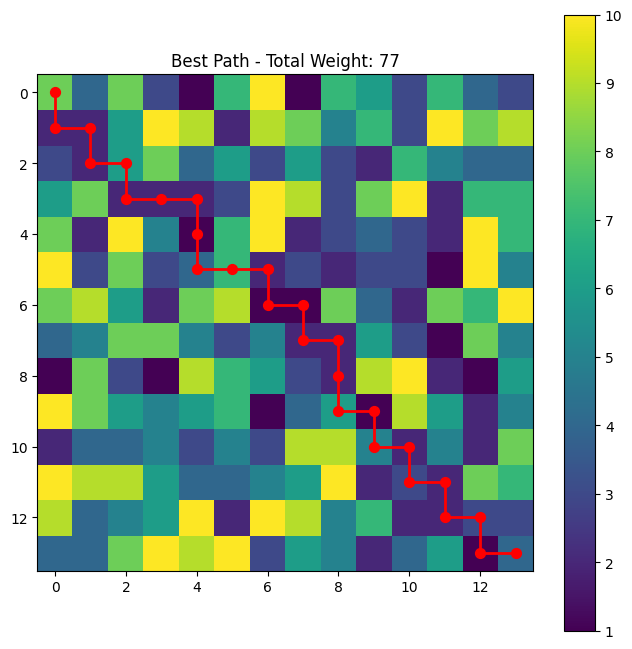

In [1]:
"""
This Best Version for Genetic Algorithm solve maze
"""
import numpy as np
import random
import matplotlib.pyplot as plt
from collections import Counter

# 1. สร้าง Grid และกำหนดค่า Weight
GRID_SIZE = 14
weights = np.random.randint(1, 11, size=(GRID_SIZE, GRID_SIZE))

# 2. ฟังก์ชันสร้างโครโมโซม
def create_individual():
    individual = ['R'] * (GRID_SIZE - 1) + ['D'] * (GRID_SIZE - 1)
    random.shuffle(individual)
    return individual

# 3. คำนวณ Fitness
def calculate_fitness(individual):
    x, y = 0, 0
    total = 0
    total += weights[y][x]  # เริ่มต้นที่จุดเริ่มต้น
    for move in individual:
        if move == 'R' and x < GRID_SIZE - 1:
            x += 1
        elif move == 'D' and y < GRID_SIZE - 1:
            y += 1
        total += weights[y][x]  # บวกค่าน้ำหนักหลังจากเคลื่อนที่
    return total

# 4. Tournament Selection
def tournament_selection(population, k=3):
    selected = random.sample(population, k)
    return min(selected, key=lambda x: x[1])[0]

# 5. Repair Function (แก้เส้นทางผิดพลาด)
def repair_path(child):
    # นับจำนวน R/D
    r_count = child.count('R')
    d_count = child.count('D')

    # แก้จำนวน R/D ให้ถูกต้อง
    while r_count > GRID_SIZE - 1:
        idx = random.choice([i for i, g in enumerate(child) if g == 'R'])
        child[idx] = 'D'
        r_count -= 1
        d_count += 1

    while d_count > GRID_SIZE - 1:
        idx = random.choice([i for i, g in enumerate(child) if g == 'D'])
        child[idx] = 'R'
        d_count -= 1
        r_count += 1

    return child

# 6. Ordered Crossover (OX) พร้อม Repair
def crossover(parent1, parent2):
    size = len(parent1)
    start, end = sorted(random.sample(range(size), 2))
    child = [None] * size

    # คัดลอกช่วงจาก parent1
    child[start:end] = parent1[start:end]

    # ตรวจสอบจำนวน R และ D ที่มีในปัจจุบัน
    count_child = Counter(child[start:end])
    count_parent2 = Counter(parent2)

    # คำนวณจำนวน R และ D ที่ควรมี
    required_r = GRID_SIZE - 1
    required_d = GRID_SIZE - 1

    # เติมค่าที่เหลือจาก parent2 แต่ต้องให้ถูกต้อง
    remaining_r = required_r - count_child['R']
    remaining_d = required_d - count_child['D']

    new_remaining = []
    for gene in parent2:
        if gene == 'R' and remaining_r > 0:
            new_remaining.append(gene)
            remaining_r -= 1
        elif gene == 'D' and remaining_d > 0:
            new_remaining.append(gene)
            remaining_d -= 1

    ptr = 0
    for i in range(size):
        if child[i] is None:
            child[i] = new_remaining[ptr]
            ptr += 1

    return child

# 7. Mutation (Swap) พร้อม Repair
def mutate(individual, mutation_rate=0.1):
    if random.random() < mutation_rate:
        idx1, idx2 = random.sample(range(len(individual)), 2)
        individual[idx1], individual[idx2] = individual[idx2], individual[idx1]
    return repair_path(individual)

# 8. สร้าง Population เริ่มต้น
POP_SIZE = 100
population = [(create_individual(), 0) for _ in range(POP_SIZE)]

# 9. Evolution Loop
GENERATIONS = 50
best_fitness = float('inf')
best_individual = None
no_improve_count = 0

for gen in range(GENERATIONS):
    population = [(ind, calculate_fitness(ind)) for ind, _ in population]
    current_best = min(population, key=lambda x: x[1])

    if current_best[1] < best_fitness:
        best_fitness = current_best[1]
        best_individual = current_best[0]
        no_improve_count = 0  # รีเซ็ตตัวนับ
    else:
        no_improve_count += 1

    if no_improve_count >= 10:  # หยุดถ้าไม่มีการปรับปรุง 10 รอบ
        print(f"Early Stopping at Generation {gen+1}")
        break

    new_population = [(current_best[0], current_best[1])]  # Elitism
    while len(new_population) < POP_SIZE:
        parent1 = tournament_selection(population)
        parent2 = tournament_selection(population)
        child = crossover(parent1, parent2)
        child = mutate(child)
        new_population.append((child, 0))

    population = new_population
    print(f"Gen {gen+1}: Best Fitness = {best_fitness}")

# 10. Visualization
def plot_path(path):
    x, y = 0, 0
    path_x = [x]
    path_y = [y]
    for move in path:
        if move == 'R': x += 1
        else: y += 1
        path_x.append(x)
        path_y.append(y)

    plt.figure(figsize=(8, 8))
    plt.imshow(weights, cmap='viridis')
    plt.colorbar()
    plt.plot(path_x, path_y, 'r-', linewidth=2)
    plt.scatter(path_x, path_y, c='red', s=50)
    plt.title(f"Best Path - Total Weight: {best_fitness}")
    plt.show()

print("\nBest Path:", ''.join(best_individual))
plot_path(best_individual)


เลือกเส้นทางที่ดีที่สุดจาก 10 ตัวเลือก:


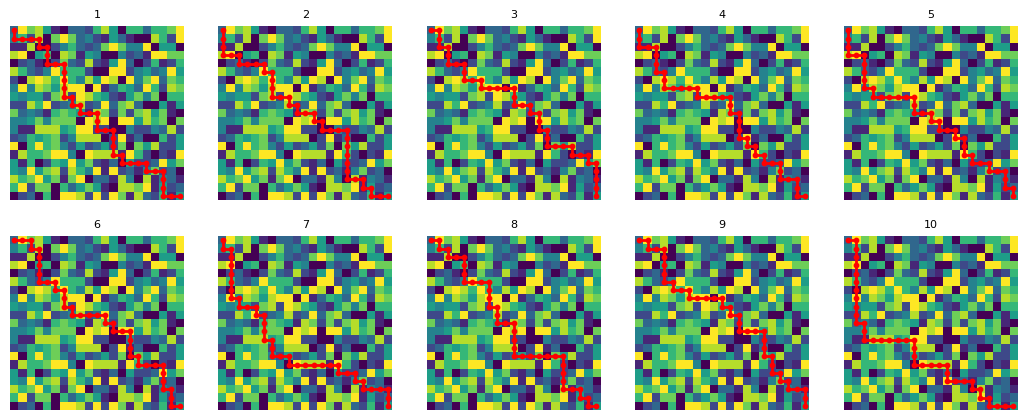

เลือกหมายเลขเส้นทางที่ดีที่สุด (1-10) หรือ 0 เพื่อหยุด: 1

เลือกเส้นทางที่ดีที่สุดจาก 10 ตัวเลือก:


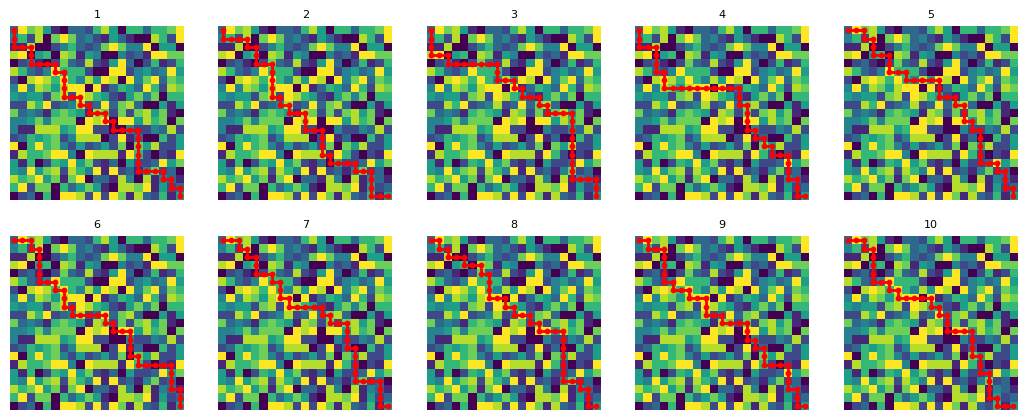

เลือกหมายเลขเส้นทางที่ดีที่สุด (1-10) หรือ 0 เพื่อหยุด: 0

เส้นทางที่คุณเลือก:


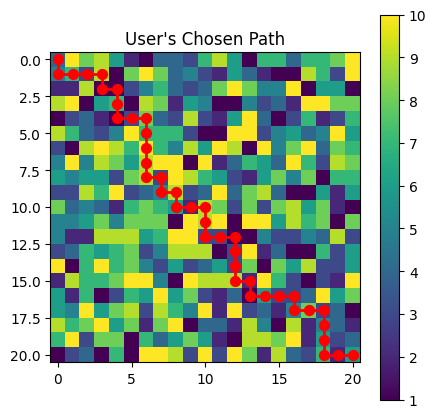


เส้นทางที่ดีที่สุดที่ระบบเก็บไว้:


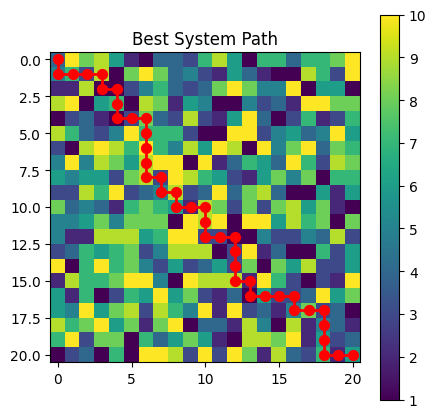

In [2]:
"""
This optional version

use can choose path from 10 path
"""
import numpy as np
import random
import matplotlib.pyplot as plt

# สร้าง Grid และกำหนดค่า Weight
GRID_SIZE = 21
weights = np.random.randint(1, 11, size=(GRID_SIZE, GRID_SIZE))

# ฟังก์ชันสร้างโครโมโซม
def create_individual():
    individual = ['R'] * (GRID_SIZE - 1) + ['D'] * (GRID_SIZE - 1)
    random.shuffle(individual)
    return individual

# คำนวณ Fitness
def calculate_fitness(individual):
    x, y = 0, 0
    total = weights[y][x]
    for move in individual:
        if move == 'R' and x < GRID_SIZE - 1:
            x += 1
        elif move == 'D' and y < GRID_SIZE - 1:
            y += 1
        total += weights[y][x]
    return total

# Repair Function (แก้เส้นทางผิดพลาด)
def repair_path(child):
    r_count = child.count('R')
    d_count = child.count('D')

    while r_count > GRID_SIZE - 1:
        idx = random.choice([i for i, g in enumerate(child) if g == 'R'])
        child[idx] = 'D'
        r_count -= 1
        d_count += 1

    while d_count > GRID_SIZE - 1:
        idx = random.choice([i for i, g in enumerate(child) if g == 'D'])
        child[idx] = 'R'
        d_count -= 1
        r_count += 1

    return child

# Ordered Crossover (OX)
def crossover(parent1, parent2):
    size = len(parent1)
    start, end = sorted(random.sample(range(size), 2))
    child = [None] * size
    child[start:end] = parent1[start:end]

    remaining = [g for g in parent2 if g not in child[start:end] or child.count(g) < parent2.count(g)]
    ptr = 0
    for i in range(size):
        if child[i] is None:
            child[i] = remaining[ptr]
            ptr += 1
    return repair_path(child)

# Mutation
def mutate(individual, mutation_rate=0.1):
    if random.random() < mutation_rate:
        idx1, idx2 = random.sample(range(len(individual)), 2)
        individual[idx1], individual[idx2] = individual[idx2], individual[idx1]
    return repair_path(individual)

# สร้าง Population เริ่มต้น
POP_SIZE = 10
population = [(create_individual(), 0) for _ in range(POP_SIZE)]

best_fitness = float('inf')
best_individual = None
user_choice = None

def plot_path(path, title):
    x, y = 0, 0
    path_x = [x]
    path_y = [y]
    for move in path:
        if move == 'R': x += 1
        else: y += 1
        path_x.append(x)
        path_y.append(y)

    plt.figure(figsize=(5, 5))
    plt.imshow(weights, cmap='viridis')
    plt.colorbar()
    plt.plot(path_x, path_y, 'r-', linewidth=2)
    plt.scatter(path_x, path_y, c='red', s=50)
    plt.title(title)
    plt.show()

while True:
    population = [(ind, calculate_fitness(ind)) for ind, _ in population]
    population.sort(key=lambda x: x[1])

    print("\nเลือกเส้นทางที่ดีที่สุดจาก 10 ตัวเลือก:")
    fig, axes = plt.subplots(2, 5, figsize=(13, 5))
    for i, (ind, fitness) in enumerate(population):
        ax = axes[i // 5, i % 5]
        x, y = 0, 0
        path_x = [x]
        path_y = [y]
        for move in ind:
            if move == 'R': x += 1
            else: y += 1
            path_x.append(x)
            path_y.append(y)
        ax.imshow(weights, cmap='viridis')
        ax.plot(path_x, path_y, 'r-', linewidth=2)
        ax.scatter(path_x, path_y, c='red', s=10)
        ax.set_title(f"{i+1}", fontsize=8)
        ax.axis('off')
    plt.show(block=False)
    plt.pause(0.1)
    plt.show()

    choice = int(input("เลือกหมายเลขเส้นทางที่ดีที่สุด (1-10) หรือ 0 เพื่อหยุด: "))
    if choice == 0:
        break

    user_choice = population[choice-1][0]
    best_fitness = population[0][1]
    best_individual = population[0][0]

    # สร้าง generation ใหม่
    new_population = [(user_choice, calculate_fitness(user_choice))]
    while len(new_population) < POP_SIZE:
        parent1, _ = random.choice(population)
        parent2, _ = random.choice(population)
        child = crossover(parent1, parent2)
        child = mutate(child)
        new_population.append((child, calculate_fitness(child)))

    population = new_population

print("\nเส้นทางที่คุณเลือก:")
plot_path(user_choice, "User's Chosen Path")
print("\nเส้นทางที่ดีที่สุดที่ระบบเก็บไว้:")
plot_path(best_individual, "Best System Path")

Gen 1: Best Fitness = 87
Gen 2: Best Fitness = 80
Gen 3: Best Fitness = 75
Gen 4: Best Fitness = 73
Gen 5: Best Fitness = 73
Gen 6: Best Fitness = 70
Gen 7: Best Fitness = 70
Gen 8: Best Fitness = 70
Gen 9: Best Fitness = 70
Gen 10: Best Fitness = 70
Gen 11: Best Fitness = 70
Gen 12: Best Fitness = 70
Gen 13: Best Fitness = 70
Gen 14: Best Fitness = 70
Gen 15: Best Fitness = 70
Early Stopping at Generation 16

Best Path: DRDDDDDDDDRRRDRRRRRR


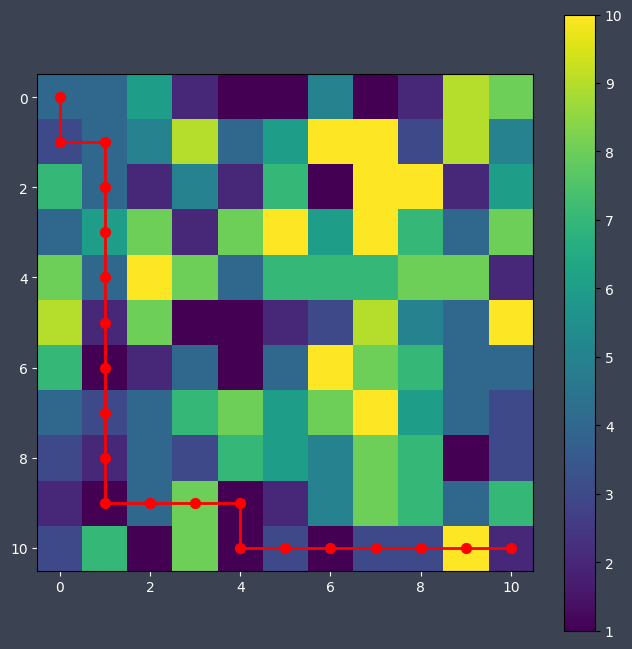

In [ ]:
"""
This Version is for Presentation about Genetic Algorithm solve maze
"""
import numpy as np
import random
import matplotlib.pyplot as plt
from collections import Counter

# 1. สร้าง Grid และกำหนดค่า Weight
GRID_SIZE = 11
weights = np.random.randint(1, 11, size=(GRID_SIZE, GRID_SIZE))

# 2. ฟังก์ชันสร้างโครโมโซม
def create_individual():
    individual = ['R'] * (GRID_SIZE - 1) + ['D'] * (GRID_SIZE - 1)
    random.shuffle(individual)
    return individual

# 3. คำนวณ Fitness
def calculate_fitness(individual):
    x, y = 0, 0
    total = 0
    total += weights[y][x]  # เริ่มต้นที่จุดเริ่มต้น
    for move in individual:
        if move == 'R' and x < GRID_SIZE - 1:
            x += 1
        elif move == 'D' and y < GRID_SIZE - 1:
            y += 1
        total += weights[y][x]  # บวกค่าน้ำหนักหลังจากเคลื่อนที่
    return total

# 4. Tournament Selection
def tournament_selection(population, k=3):
    selected = random.sample(population, k)
    return min(selected, key=lambda x: x[1])[0]

# 5. Repair Function (แก้เส้นทางผิดพลาด)
def repair_path(child):
    # นับจำนวน R/D
    r_count = child.count('R')
    d_count = child.count('D')

    # แก้จำนวน R/D ให้ถูกต้อง
    while r_count > GRID_SIZE - 1:
        idx = random.choice([i for i, g in enumerate(child) if g == 'R'])
        child[idx] = 'D'
        r_count -= 1
        d_count += 1

    while d_count > GRID_SIZE - 1:
        idx = random.choice([i for i, g in enumerate(child) if g == 'D'])
        child[idx] = 'R'
        d_count -= 1
        r_count += 1

    return child

# 6. Ordered Crossover (OX) พร้อม Repair
def crossover(parent1, parent2):
    size = len(parent1)
    start, end = sorted(random.sample(range(size), 2))
    child = [None] * size

    # คัดลอกช่วงจาก parent1
    child[start:end] = parent1[start:end]

    # ตรวจสอบจำนวน R และ D ที่มีในปัจจุบัน
    count_child = Counter(child[start:end])
    count_parent2 = Counter(parent2)

    # คำนวณจำนวน R และ D ที่ควรมี
    required_r = GRID_SIZE - 1
    required_d = GRID_SIZE - 1

    # เติมค่าที่เหลือจาก parent2 แต่ต้องให้ถูกต้อง
    remaining_r = required_r - count_child['R']
    remaining_d = required_d - count_child['D']

    new_remaining = []
    for gene in parent2:
        if gene == 'R' and remaining_r > 0:
            new_remaining.append(gene)
            remaining_r -= 1
        elif gene == 'D' and remaining_d > 0:
            new_remaining.append(gene)
            remaining_d -= 1

    ptr = 0
    for i in range(size):
        if child[i] is None:
            child[i] = new_remaining[ptr]
            ptr += 1

    return child

# 7. Mutation (Swap) พร้อม Repair
def mutate(individual, mutation_rate=0.1):
    if random.random() < mutation_rate:
        idx1, idx2 = random.sample(range(len(individual)), 2)
        individual[idx1], individual[idx2] = individual[idx2], individual[idx1]
    return repair_path(individual)

# 8. สร้าง Population เริ่มต้น
POP_SIZE = 100
population = [(create_individual(), 0) for _ in range(POP_SIZE)]

# 9. Evolution Loop
GENERATIONS = 50
best_fitness = float('inf')
best_individual = None
no_improve_count = 0

for gen in range(GENERATIONS):
    population = [(ind, calculate_fitness(ind)) for ind, _ in population]
    current_best = min(population, key=lambda x: x[1])

    if current_best[1] < best_fitness:
        best_fitness = current_best[1]
        best_individual = current_best[0]
        no_improve_count = 0  # รีเซ็ตตัวนับ
    else:
        no_improve_count += 1

    if no_improve_count >= 10:  # หยุดถ้าไม่มีการปรับปรุง 10 รอบ
        print(f"Early Stopping at Generation {gen+1}")
        break

    new_population = [(current_best[0], current_best[1])]  # Elitism
    while len(new_population) < POP_SIZE:
        parent1 = tournament_selection(population)
        parent2 = tournament_selection(population)
        child = crossover(parent1, parent2)
        child = mutate(child)
        new_population.append((child, 0))

    population = new_population
    print(f"Gen {gen+1}: Best Fitness = {best_fitness}")

# 10. Visualization
def plot_path(path):
    x, y = 0, 0
    path_x = [x]
    path_y = [y]
    for move in path:
        if move == 'R': x += 1
        else: y += 1
        path_x.append(x)
        path_y.append(y)

    fig, ax = plt.subplots(figsize=(8, 8))
    fig.patch.set_facecolor('#3B4252')  # เปลี่ยนสีพื้นหลังของ figure
    ax.set_facecolor('#3B4252')

    im = ax.imshow(weights, cmap='viridis')
    cbar = plt.colorbar(im, ax=ax)

    cbar.ax.yaxis.set_tick_params(labelcolor='white')

    ax.tick_params(axis='x', colors='white')
    ax.tick_params(axis='y', colors='white')

    ax.plot(path_x, path_y, 'r-', linewidth=2)
    ax.scatter(path_x, path_y, c='red', s=50)
    plt.show()

print("\nBest Path:", ''.join(best_individual))
plot_path(best_individual)